# **Finance Pairs Formation**

# **Import libraries and dataset**

In [1]:
import numpy as np
import pandas as pd
import statsmodels
from statsmodels.tsa.stattools import coint, adfuller
import statistics as stats
import plotly.graph_objects as go
import missingno as msno
import plotly.express as px
import plotly.figure_factory as ff
import itertools
from heapq import nsmallest, nlargest
import matplotlib.pyplot as plt
import seaborn as sns
import more_itertools
from statsmodels.tsa.vector_ar.vecm import coint_johansen
import statsmodels.api as sm

sns.set(rc={'figure.figsize':(20,14)})

In [2]:
import sys
# locate the folder which stores the custom package using relative path
sys.path.append('../../../../../src')

import config_snippets as config_snp
import splitting_data as splitting_data
import gatev_distance_method as gatev_dist
import data_transformation_snippets as data_transform_snp
import time_series_analysis_snippets as tsa_snp
import engle_granger_cointegration_method as eg_coint
import johansen_cointegration_method as jj_coint 
import handling_dataframe as hdf
import handling_datetime as hdt

In [3]:
# Path to your config YAML file
config_file_path = "..//..//../config.yaml"

# Load the configuration
config = config_snp.load_config(config_file_path)

if config is not None:
    import ast
    # Access and use the parameters
    split_ratio = config.get("split_ratio")
    
    # Access and convert string to tuple
    # train_period = ast.literal_eval(config.get("train_period"))
    # test_period = ast.literal_eval(config.get("test_period"))
    
    # Get list of df_consumer_good data paths
    lst_df_consumer_good_paths = ast.literal_eval(config.get("paths_df_consumer_good_processed"))
    

In [4]:
# Import data 
path = lst_df_consumer_good_paths[2]
df = pd.read_csv(path)

In [5]:
# Set date as index
df.set_index("date", inplace=True)

In [6]:
df = df.dropna()

# **Split data**

In [7]:
# Example: split ratio = 0.7
df_train, df_test = splitting_data.splitting_data_by_ratio(
    df,
    split_ratio=split_ratio
)

In [8]:
# Example of splitting by specified period

# test_train, test_test = splitting_data_by_date(
#     df,
#     train_period = train_period,
#     test_period = test_period
# )

# **Gatev Distance Approach**

In [9]:
df_train

,adClose_DBC,adClose_DLG,adClose_HHS,adClose_HNG,adClose_IDI,adClose_SBT,adClose_TNG,adClose_TSC,adClose_TTF,adClose_VNM
date,,,,,,,,,,
2022-02-07,33.477,7.12,9.214,9.41,11.757,19.200,23.661,15.102,12.80,76.785
2022-02-08,34.048,6.91,9.167,9.45,12.547,19.540,24.703,15.416,12.95,75.406
2022-02-09,33.810,7.05,9.492,9.47,12.919,19.540,24.544,15.911,13.05,76.141
2022-02-10,34.334,7.09,9.492,9.80,13.151,19.540,25.024,15.731,12.90,76.049
2022-02-11,35.239,6.99,9.353,9.51,12.965,19.412,24.784,15.551,13.15,75.406
...,...,...,...,...,...,...,...,...,...,...
2023-03-08,13.500,2.20,3.889,4.26,11.800,13.546,16.920,3.700,4.21,74.037
2023-03-09,14.250,2.21,3.880,4.35,11.600,13.682,16.643,3.800,4.30,74.037
2023-03-10,14.150,2.16,3.843,4.28,11.750,13.364,16.920,3.790,4.25,74.424


## **Gatev Data Normalization**

In [10]:
df_cum_daily_returns_train = gatev_dist.gatev_data_normalize(df_train)

In [11]:
df_cum_daily_returns_train

,adClose_DBC,adClose_DLG,adClose_HHS,adClose_HNG,adClose_IDI,adClose_SBT,adClose_TNG,adClose_TSC,adClose_TTF,adClose_VNM
date,,,,,,,,,,
2022-02-08,1.705649,-2.949438,-0.510093,0.425080,6.719401,1.770833,4.403871,2.079195,1.171875,-1.795924
2022-02-09,0.994713,-0.983146,3.017148,0.637620,9.883474,1.770833,3.731879,5.356906,1.953125,-0.838705
2022-02-10,2.559967,-0.421348,3.017148,4.144527,11.856766,1.770833,5.760534,4.165011,0.781250,-0.958521
2022-02-11,5.263315,-1.825843,1.508574,1.062699,10.274730,1.104167,4.746207,2.973116,2.734375,-1.795924
2022-02-12,5.263315,-1.825843,1.508574,1.062699,10.274730,1.104167,4.746207,2.973116,2.734375,-1.795924
...,...,...,...,...,...,...,...,...,...,...
2023-03-08,-59.673806,-69.101124,-57.792490,-54.729012,0.365740,-29.447917,-28.489920,-75.499934,-67.109375,-3.578824
2023-03-09,-57.433462,-68.960674,-57.890167,-53.772582,-1.335375,-28.739583,-29.660623,-74.837770,-66.406250,-3.578824
2023-03-10,-57.732174,-69.662921,-58.291730,-54.516472,-0.059539,-30.395833,-28.489920,-74.903986,-66.796875,-3.074819


## **Gatev Distance Approach Pairs Formation**

In [12]:
gatev_dist.gatev_distance_matrix(df_cum_daily_returns_train)

In [13]:
gatev_pairs, list_result_smallest_dist = gatev_dist.gatev_distance_smallest(
    df=df_cum_daily_returns_train,
    top_values=10
)

In [14]:
for res in list_result_smallest_dist:
    print(res)
    
print(gatev_pairs)

Khoảng cách Euclide của adClose_DBC và adClose_HHS: 177.9
Khoảng cách Euclide của adClose_DBC và adClose_HNG: 139.3
Khoảng cách Euclide của adClose_DBC và adClose_TTF: 262.7
Khoảng cách Euclide của adClose_DLG và adClose_HHS: 159.7
Khoảng cách Euclide của adClose_DLG và adClose_HNG: 244.6
Khoảng cách Euclide của adClose_DLG và adClose_TSC: 199.1
Khoảng cách Euclide của adClose_DLG và adClose_TTF: 210.1
Khoảng cách Euclide của adClose_HHS và adClose_HNG: 121.8
Khoảng cách Euclide của adClose_HHS và adClose_TTF: 173.6
Khoảng cách Euclide của adClose_HNG và adClose_TTF: 249.3
[['adClose_DBC', 'adClose_HHS'], ['adClose_DBC', 'adClose_HNG'], ['adClose_DBC', 'adClose_TTF'], ['adClose_DLG', 'adClose_HHS'], ['adClose_DLG', 'adClose_HNG'], ['adClose_DLG', 'adClose_TSC'], ['adClose_DLG', 'adClose_TTF'], ['adClose_HHS', 'adClose_HNG'], ['adClose_HHS', 'adClose_TTF'], ['adClose_HNG', 'adClose_TTF']]


In [15]:
gatev_pairs

[['adClose_DBC', 'adClose_HHS'],
 ['adClose_DBC', 'adClose_HNG'],
 ['adClose_DBC', 'adClose_TTF'],
 ['adClose_DLG', 'adClose_HHS'],
 ['adClose_DLG', 'adClose_HNG'],
 ['adClose_DLG', 'adClose_TSC'],
 ['adClose_DLG', 'adClose_TTF'],
 ['adClose_HHS', 'adClose_HNG'],
 ['adClose_HHS', 'adClose_TTF'],
 ['adClose_HNG', 'adClose_TTF']]

# **Cointegration Approach**

## **Data Transformation**

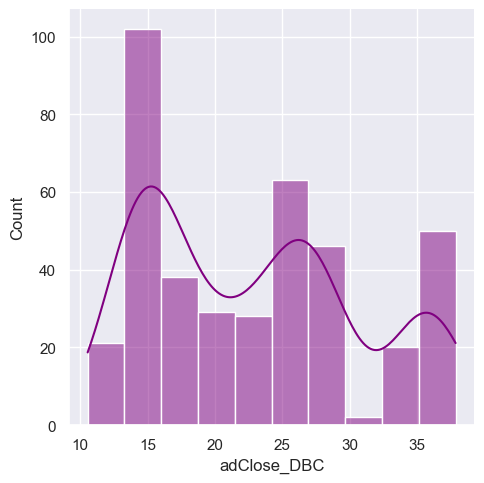

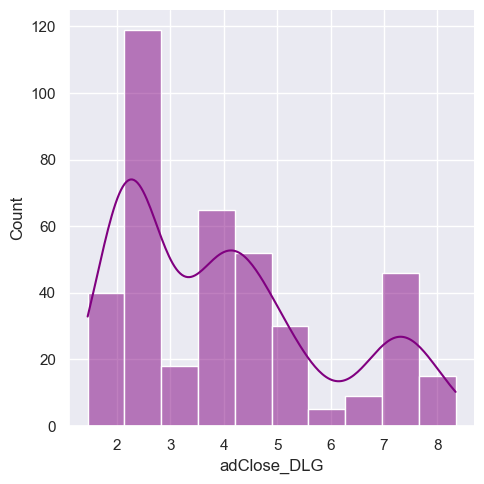

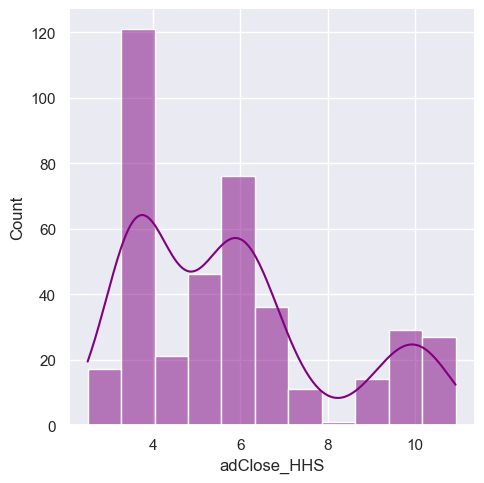

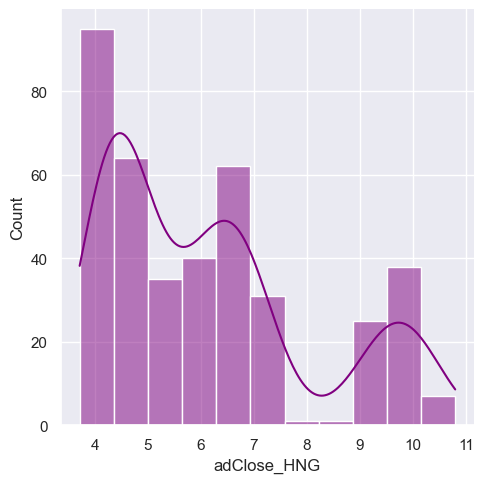

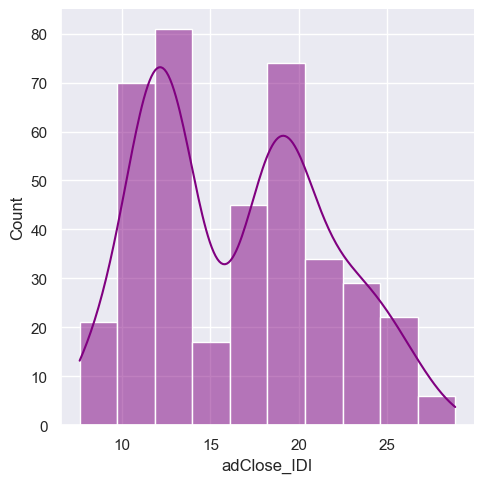

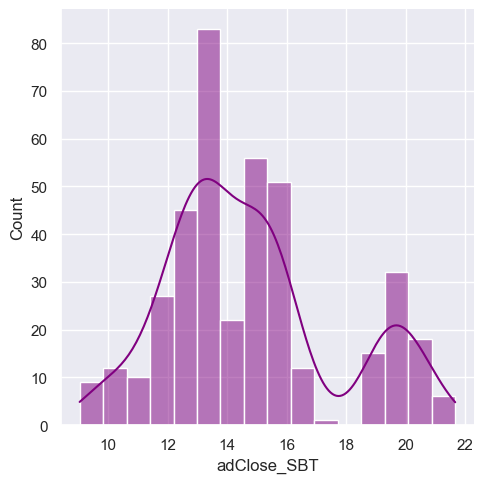

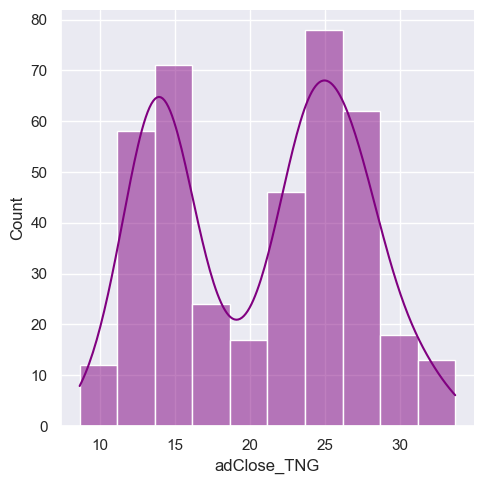

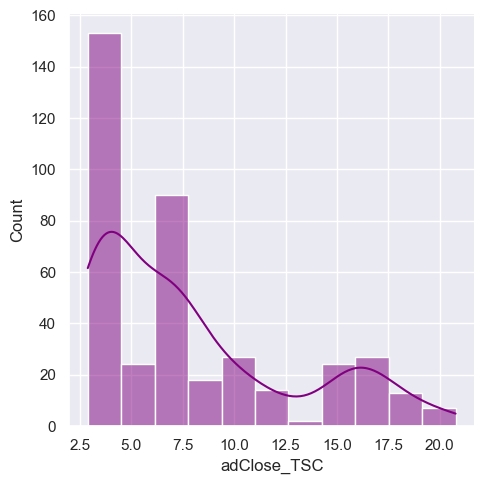

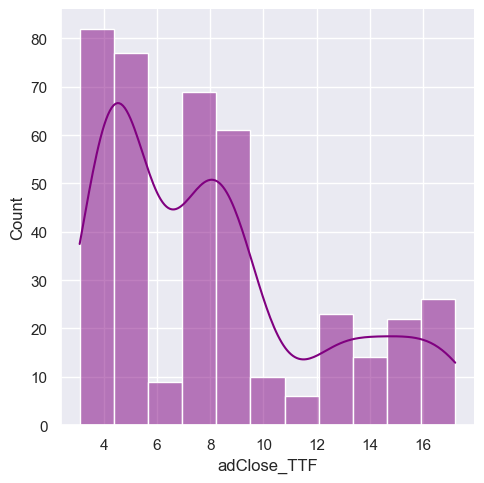

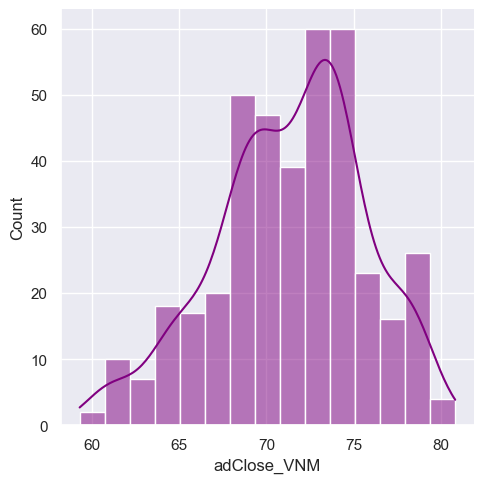

In [16]:
# Visualize distribution of values of each stock
data_transform_snp.dist_stock_visualization(df_train)

In [17]:
# Take natural log transformation of the data  
df_train_transformed = data_transform_snp.df_natural_log_transformed(df_train)

In [18]:
# Visualize distribution of transformed values of each stock
data_transform_snp.dist_stock_visualization(df_train_transformed)

## **Pretesting Stationary**

In [19]:
tsa_snp.find_integration_order(df_train_transformed)

,Column Name,Integration Order
0,adClose_DBC,1
1,adClose_DLG,1
2,adClose_HHS,1
3,adClose_HNG,1
4,adClose_IDI,1
5,adClose_SBT,1
6,adClose_TNG,1
7,adClose_TSC,1
8,adClose_TTF,1
9,adClose_VNM,1


In [20]:
# Only use time series that have order of integration is 1 
df_order_of_integration_ts = tsa_snp.find_integration_order(df_train_transformed)
lst_non_stationary_ts = df_order_of_integration_ts[
    df_order_of_integration_ts['Integration Order'] == 1
]['Column Name'].tolist()

# Keep those stocks which have order of integration is 1 
df_train_transformed = df_train_transformed[lst_non_stationary_ts]

# Print df
df_train_transformed

,adClose_DBC,adClose_DLG,adClose_HHS,adClose_HNG,adClose_IDI,adClose_SBT,adClose_TNG,adClose_TSC,adClose_TTF,adClose_VNM
date,,,,,,,,,,
2022-02-07,3.510859,1.962908,2.220724,2.241773,2.464449,2.954910,3.163828,2.714827,2.549445,4.341009
2022-02-08,3.527771,1.932970,2.215610,2.246015,2.529482,2.972464,3.206925,2.735406,2.561096,4.322887
2022-02-09,3.520757,1.953028,2.250449,2.248129,2.558699,2.972464,3.200467,2.767011,2.568788,4.332587
2022-02-10,3.536136,1.958685,2.250449,2.282382,2.576498,2.972464,3.219835,2.755633,2.557227,4.331378
2022-02-11,3.562153,1.944481,2.235697,2.252344,2.562253,2.965891,3.210198,2.744125,2.576422,4.322887
...,...,...,...,...,...,...,...,...,...,...
2023-03-08,2.602690,0.788457,1.358152,1.449269,2.468100,2.606091,2.828496,1.308333,1.437463,4.304565
2023-03-09,2.656757,0.792993,1.355835,1.470176,2.451005,2.616081,2.811990,1.335001,1.458615,4.304565
2023-03-10,2.649715,0.770108,1.346253,1.453953,2.463853,2.592565,2.828496,1.332366,1.446919,4.309778


## **Engle - Grange Method**

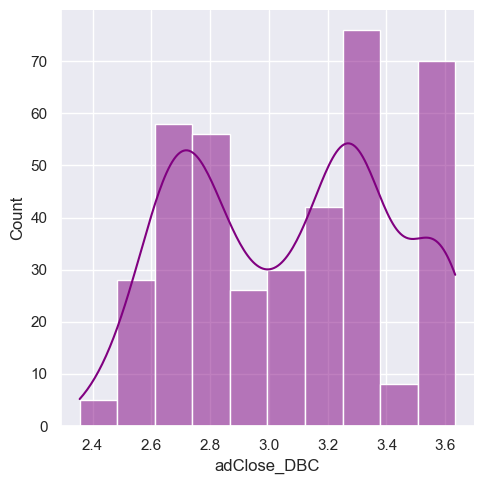

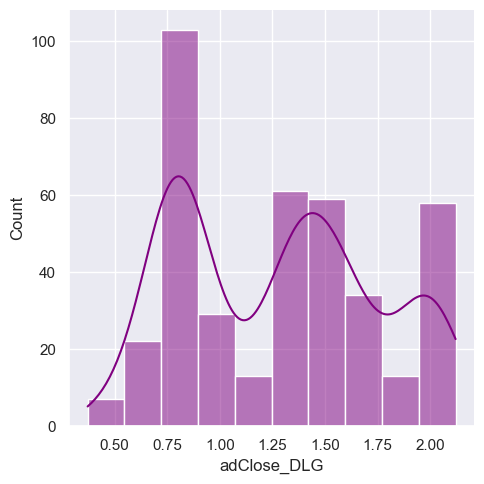

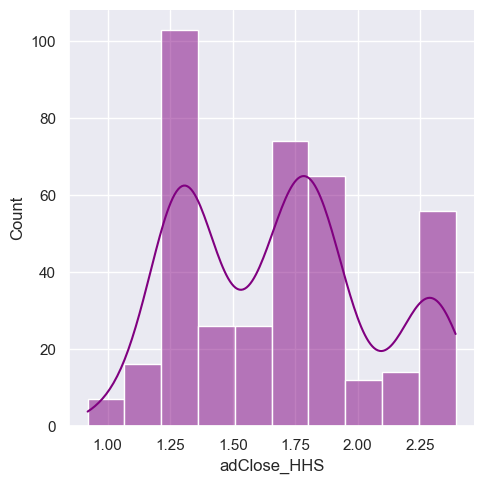

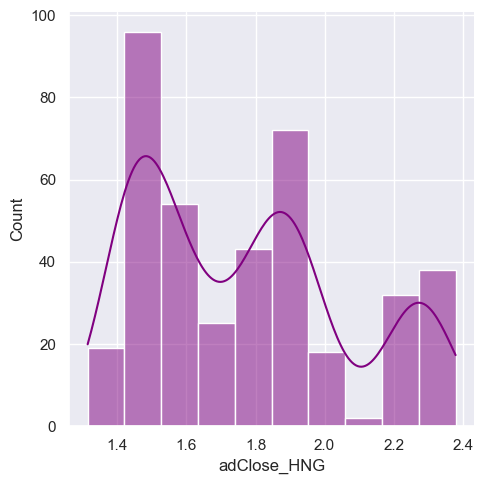

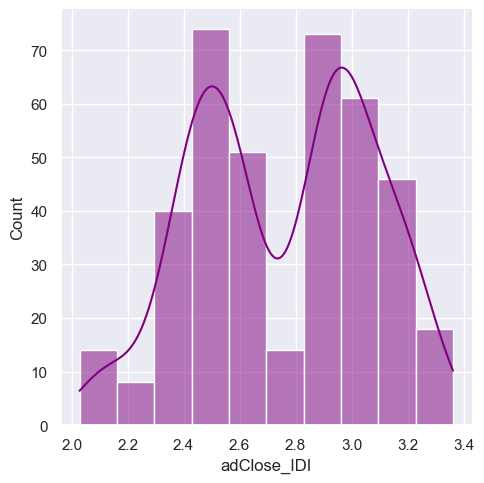

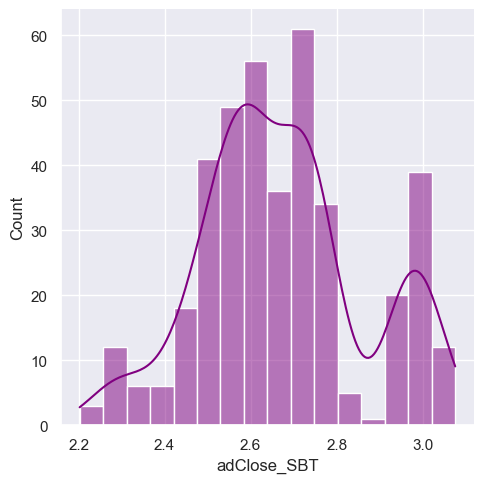

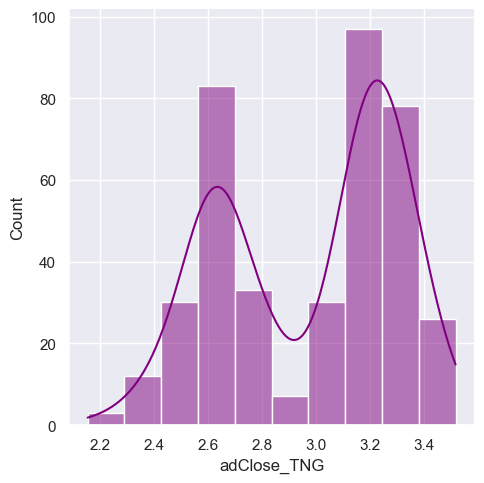

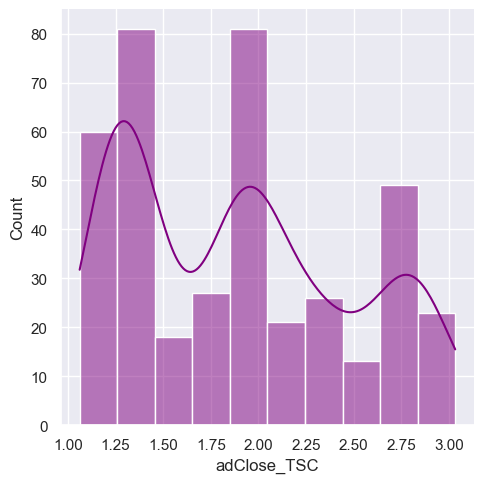

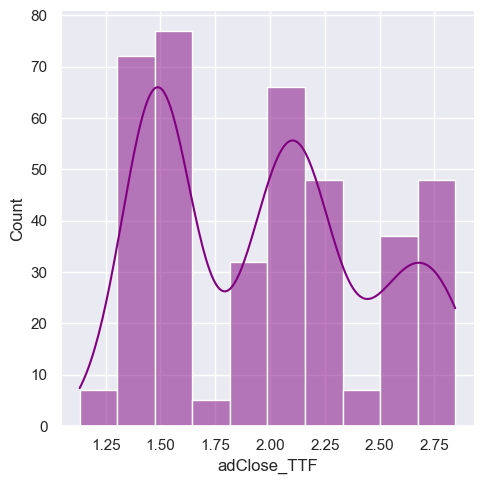

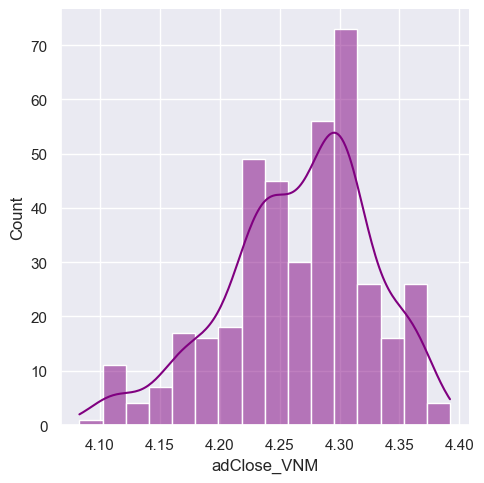

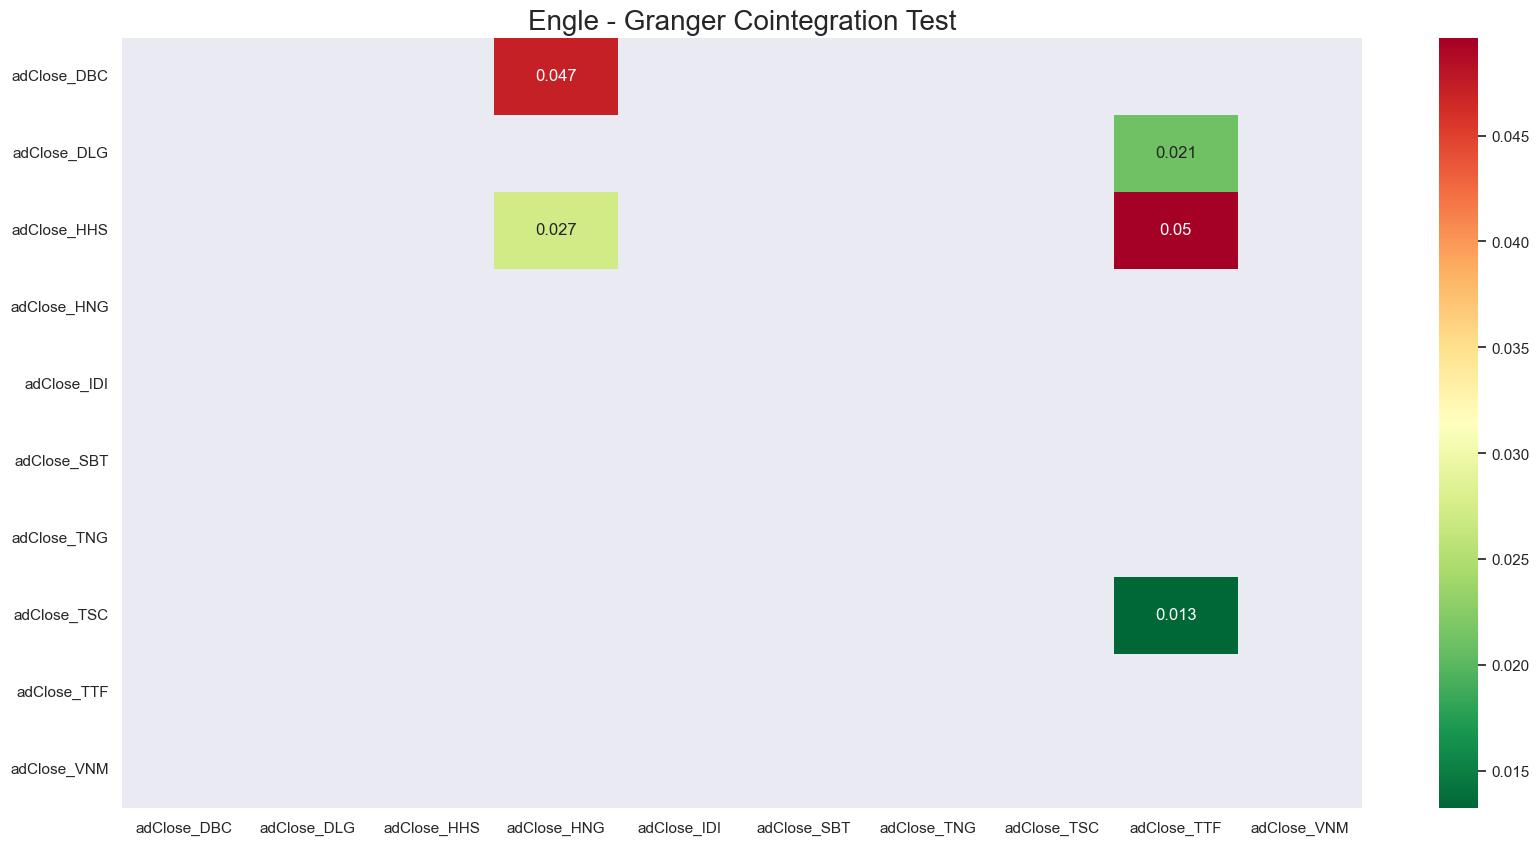

In [21]:
score_matrix, pvalue_matrix, eg_pairs = eg_coint.find_cointegrated_pairs(df_train_transformed)

In [22]:
eg_pairs 

[['adClose_DBC', 'adClose_HNG'],
 ['adClose_DLG', 'adClose_TTF'],
 ['adClose_HHS', 'adClose_HNG'],
 ['adClose_HHS', 'adClose_TTF'],
 ['adClose_TSC', 'adClose_TTF']]

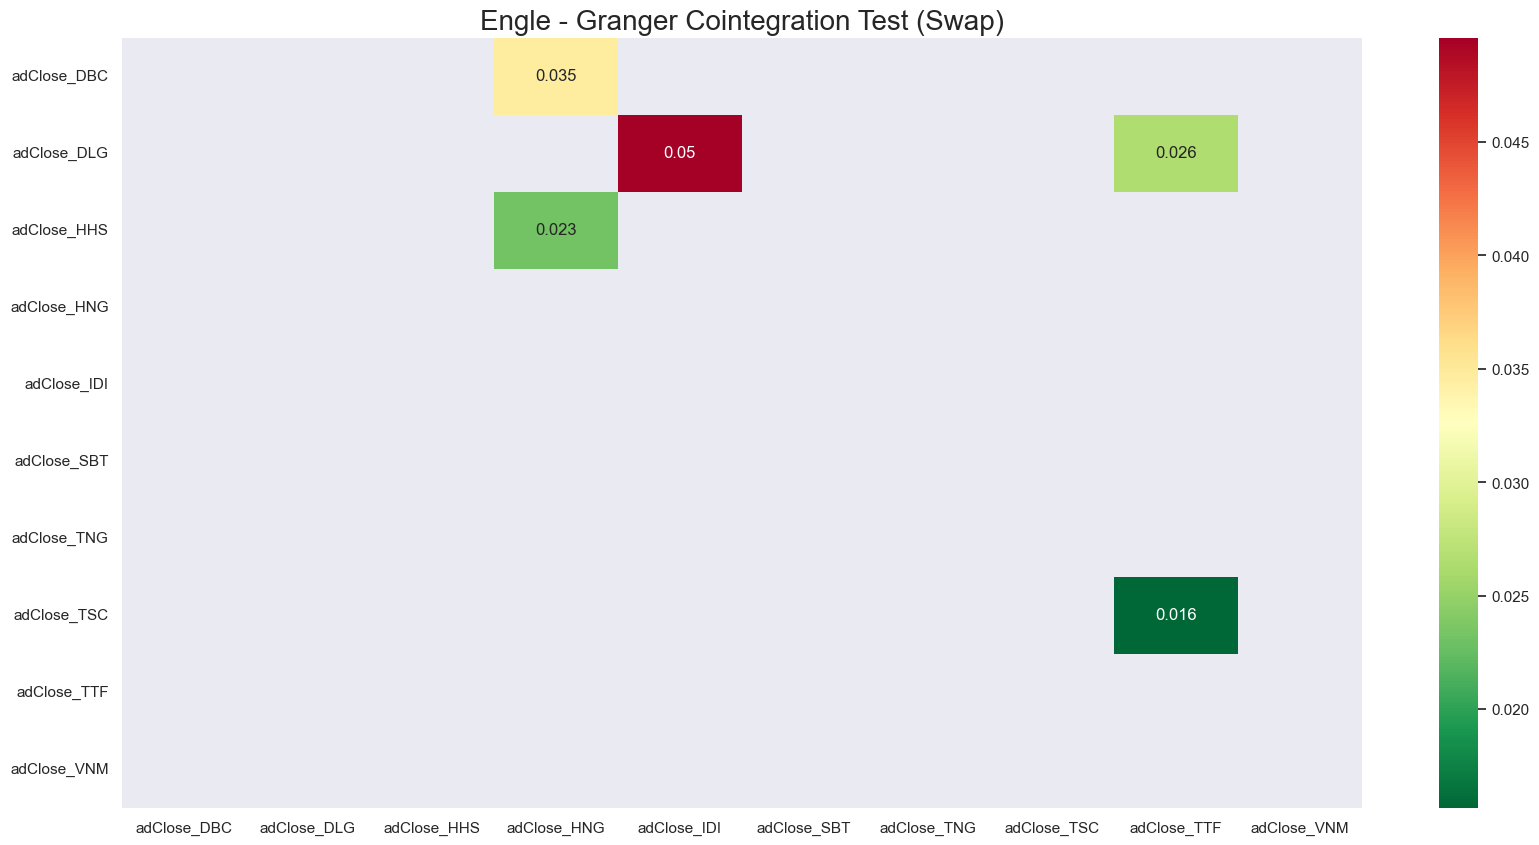

In [23]:
scores_swap, pvalues_swap, eg_pairs_swap = eg_coint.find_cointegrated_pairs_swap(df_train_transformed)

In [24]:
eg_pairs_swap

[['adClose_DBC', 'adClose_HNG'],
 ['adClose_DLG', 'adClose_IDI'],
 ['adClose_DLG', 'adClose_TTF'],
 ['adClose_HHS', 'adClose_HNG'],
 ['adClose_TSC', 'adClose_TTF']]

## **Johansen Method**

In [25]:
johansen_pairs = jj_coint.johansen_test(df_train_transformed)

In [26]:
johansen_pairs

[['adClose_DLG', 'adClose_IDI'],
 ['adClose_HHS', 'adClose_IDI'],
 ['adClose_HNG', 'adClose_IDI'],
 ['adClose_IDI', 'adClose_SBT'],
 ['adClose_IDI', 'adClose_TSC'],
 ['adClose_IDI', 'adClose_TTF'],
 ['adClose_IDI', 'adClose_VNM'],
 ['adClose_TSC', 'adClose_TTF'],
 ['adClose_TSC', 'adClose_VNM'],
 ['adClose_TTF', 'adClose_VNM']]

# **Result Summary**

In [27]:
df_pairs_formation_train = hdf.pairs_formation_result_summary(
    gatev_pairs,
    eg_pairs,
    eg_pairs_swap,
    johansen_pairs
)

In [28]:
df_pairs_formation_train

,Stock A,Stock B,Gatev Pairs,EG Pairs,EG Pairs Swap,Johansen Pairs,Count
0,adClose_DBC,adClose_HHS,x,,,,1
1,adClose_DBC,adClose_HNG,x,x,x,,3
2,adClose_DBC,adClose_TTF,x,,,,1
3,adClose_DLG,adClose_HHS,x,,,,1
4,adClose_DLG,adClose_HNG,x,,,,1
5,adClose_DLG,adClose_IDI,,,x,x,2
6,adClose_DLG,adClose_TSC,x,,,,1
7,adClose_DLG,adClose_TTF,x,x,x,,3
8,adClose_HHS,adClose_HNG,x,x,x,,3
9,adClose_HHS,adClose_IDI,,,,x,1


In [29]:
df_pairs_formation_train.to_csv(
    f"..//..//..//..//..//results//pairs_formation//consumer_good//consumer_good_pairs_formation_third_period_{hdt.today_date_to_digits()}.csv"
    )